In [104]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

import opensea.opensea_events as Events
import opensea.database as Database

In [9]:
#update opensea events
Events.update_opensea_events('ape-gang')
Events.update_opensea_events('ape-gang-old')



-----------------------------------------------------------
Getting ape-gang sales data...
1 API calls made
2 API calls made
3 API calls made
104 sales found.
write sales to MongoDB
updating ape-gang_sales with 104 documents.
-----------------------------------------------------------
Getting ape-gang transfers data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
6 API calls made
297 transfers found.
updating ape-gang_transfers with 297 documents.
-----------------------------------------------------------
Getting ape-gang listings data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
6 API calls made
7 API calls made
302 listings found.
updating ape-gang_listings with 302 documents.
-----------------------------------------------------------
Getting ape-gang cancellation data...
1 API calls made
2 API calls made
46 cancellations found.
updating ape-gang_cancellations with 46 documents.
---------------------

In [54]:
#read from mongoDB
ag_sales = Database.read_mongo('ape-gang_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
ag_old_sales = Database.read_mongo('ape-gang-old_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
apes=Database.read_mongo('ape-gang-old_traits',return_df=True)

sales = ag_sales.append(ag_old_sales)
sales.head(10)

,sale_id,asset_id,sale_quantity,collection,image_url,time,event_type,seller_wallet,buyer_wallet,block_hash,sale_currency,sale_price
0,2700634224,8419,1,ape-gang,https://lh3.googleusercontent.com/B7DyRWqIcOF6...,2022-01-01 11:15:59.974,successful,0x518354c86a487041237084a1293ca48d2d581cd4,0x2e73fa8cfb5c1cfbf0b3881a0e945594c03add1b,0xb3409b9846704e37fd1a9d4a99fe48aadb6f402d5239...,ETH,0.39990
1,2698375415,5751,1,ape-gang,https://lh3.googleusercontent.com/e3L-yKjMmysf...,2022-01-01 07:30:14.840,successful,0x0bc2dab96f47dac7c58db9469402cf3c7775a537,0x6b3fc213d1ebe98e53cc823503c8c16bc68a5489,0x52c648accce24fe71a72ca26b9a0dd2641f1497ea323...,ETH,0.26000
2,2696427922,7245,1,ape-gang,https://lh3.googleusercontent.com/UWhkU56Ueu1B...,2022-01-01 03:59:05.513,successful,0x37fabc98f5a0327159bfdfaa42d5eceb8736f4b1,0x713e87680bd4f44207a6bc03906964477302ec82,0x02df2926e80836c2560b7608103f08dfb9490a856ac9...,ETH,0.28999
3,2695862012,6459,1,ape-gang,https://lh3.googleusercontent.com/_2nDxDHlEtTt...,2022-01-01 02:55:09.867,successful,0xfc55ff1ce47029b40e54506bacb9a2e833754b80,0x2e73fa8cfb5c1cfbf0b3881a0e945594c03add1b,0xb25962997aaa04885e2d1214b20a2760799c984ff08e...,ETH,0.62500
4,2690429257,3305,1,ape-gang,https://lh3.googleusercontent.com/86Trr-kBVZEQ...,2021-12-31 17:58:39.163,successful,0x4839b3b8cba753e20407e8265af81d65195e5bb8,0xea2e94274537feb8e56559b8dda4b0f02fb4f51e,0x9da16f1805752251893dfb4b1aefd5767d7098068592...,ETH,0.30000
5,2690421046,6167,1,ape-gang,https://lh3.googleusercontent.com/5kj1FqLdMib0...,2021-12-31 17:57:52.047,successful,0xfaea523cdf00e9be0a82fa201fbb111330cc7c0c,0xec4e738173a276736794123da2a9ad31a380cb19,0x6e89c92f084d3833564e013709a0438415ff43919720...,ETH,0.29900
6,2668425347,8886,1,ape-gang,https://lh3.googleusercontent.com/TMi1CcMLctD1...,2021-12-30 05:20:31.954,successful,0x3b05429741445d71a45accb35137cd0ae18686d0,0x695e63e22170f10bc46a29722b724d60ae4c0b76,0x645dc9dd138c59a465e38e35193d1f4c2206d7661711...,ETH,0.69000
7,2668140868,4571,1,ape-gang,https://lh3.googleusercontent.com/FlGc0l6MD-FV...,2021-12-30 04:36:53.783,successful,0xfac6ef175082b4107a1c738f22db5ae2a91569ab,0x7476b81f8dbed81a51f26a143b8e1c2e5cad59c5,0x232f9372fe9d09e7e69b5de5b6745d0f7235e54fc8a7...,ETH,0.40000
8,2667744517,4513,1,ape-gang,https://lh3.googleusercontent.com/cdG2KwsoJWLo...,2021-12-30 03:58:31.834,successful,0x3b05429741445d71a45accb35137cd0ae18686d0,0x48d5e28686a33341fd9bb0f255d597ea819adca0,0x5343152dce3ee2a457cbea86c643a807e5cb0efb865b...,ETH,0.50000
9,2667744225,7,1,ape-gang,https://lh3.googleusercontent.com/CR3Mha0o1qiz...,2021-12-30 03:58:30.092,successful,0x3b05429741445d71a45accb35137cd0ae18686d0,0x695e63e22170f10bc46a29722b724d60ae4c0b76,0x5343152dce3ee2a457cbea86c643a807e5cb0efb865b...,ETH,0.69000


In [55]:
day_n = 30
recent_sales = sales[sales.time > dt.datetime.now()-dt.timedelta(days=day_n)]
print(f"Age Gang {day_n} day sale volume= {round(recent_sales.sale_price.sum(),2)}Eth. With {recent_sales.shape[0]} sales and a median sale of {round(recent_sales.sale_price.median(),2)} Eth")



Age Gang 30 day sale volume= 194.63Eth. With 491 sales and a median sale of 0.37 Eth


In [58]:
recent_sales = recent_sales[['asset_id','sale_price','time']].merge(apes, on='asset_id',how='left').sort_values('sale_price',ascending=False)
recent_sales.head(10)

,asset_id,sale_price,time,name,Clothes,Ears,Eyes,Fur,Hat,Mouth,trait_n,Clothes_rarity,Ears_rarity,Eyes_rarity,Fur_rarity,Hat_rarity,Mouth_rarity,trait_n_rarity,factoral_rarity,rarity_rank
83,2775,3.000,2022-01-05 13:39:11.311,ApeGang #2775,Grey Striped T-Shirt,NaN,Robot,Robot,NaN,NaN,3,0.0259,0.7565,0.0265,0.0035,0.3096,0.3141,0.2239,374.262004,147
265,3140,1.550,2021-12-15 23:36:19.032,ApeGang #3140,Batman,NaN,NaN,Brown,NaN,NaN,2,0.0123,0.7565,0.3104,0.4242,0.3096,0.3141,0.0388,120.388588,7218
477,137,1.200,2022-01-04 18:29:55.259,ApeGang #137,Magician,Gold Hoop,Blind,White,Hippie Bandana,Flames,6,0.0277,0.0475,0.0144,0.0402,0.0182,0.0341,0.0546,254.059367,357
154,8534,1.100,2022-01-03 23:50:17.603,ApeGang #8534,Red NBA Jersey,Bluetooth Earpiece,Rainbow Sunglasses,Black,Cap,Nose Ring,6,0.0248,0.0520,0.0176,0.0868,0.0175,0.0318,0.0546,234.796685,469
68,315,1.000,2022-01-05 14:34:30.670,ApeGang #315,Groom,NaN,Gold Sunglasses,Brown,Headphone,NaN,4,0.0258,0.7565,0.0471,0.4242,0.0200,0.3141,0.3968,119.374229,7322
64,1287,0.880,2022-01-05 15:36:39.942,ApeGang #1287,Pirate,NaN,Laser,Cheetah,Hippie Bandana,NaN,4,0.0233,0.7565,0.0167,0.0294,0.0182,0.3141,0.3968,198.783093,1292
381,9119,0.875,2021-12-09 06:47:53.610,ApeGang #9119,NaN,NaN,Robot,Red Devil,Pirate,Joint,4,0.2202,0.7565,0.0265,0.0162,0.0162,0.0325,0.3968,200.345234,1209
399,8012,0.800,2021-12-07 17:06:15.321,ApeGang #8012,Iron Man,NaN,NaN,Grey,Laurel,NaN,3,0.0122,0.7565,0.3104,0.0815,0.0208,0.3141,0.2239,154.507580,4137
324,7355,0.800,2021-12-12 07:34:18.855,ApeGang #7355,Sheriff,NaN,Albino,Rainbow,Propeller,Covid Mask,5,0.0245,0.7565,0.0170,0.0195,0.0184,0.0290,0.2848,244.585605,392
58,7032,0.800,2021-12-16 20:38:12.891,ApeGang #7032,Groom,NaN,NaN,Cream,Magician,Cigarette,4,0.0258,0.7565,0.3104,0.0845,0.0213,0.0323,0.3968,135.565806,5877


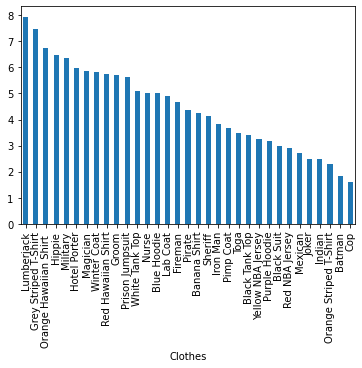

None


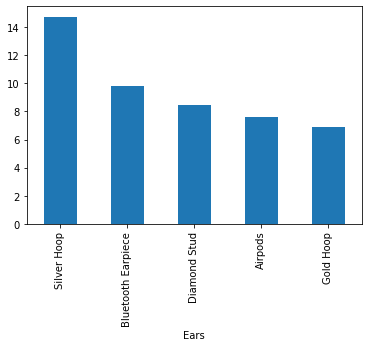

None


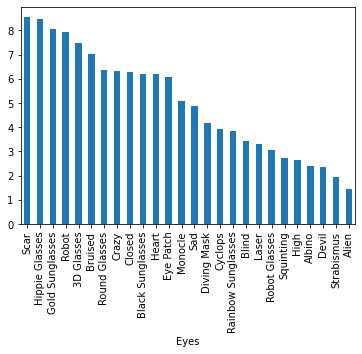

None


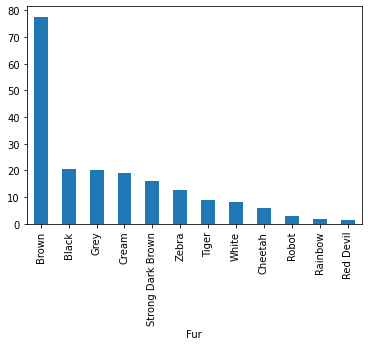

None


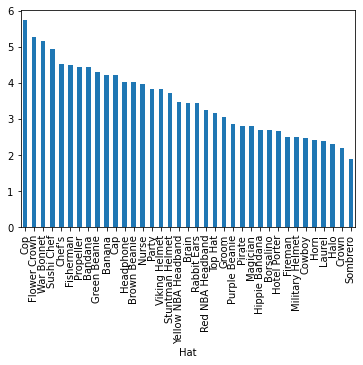

None


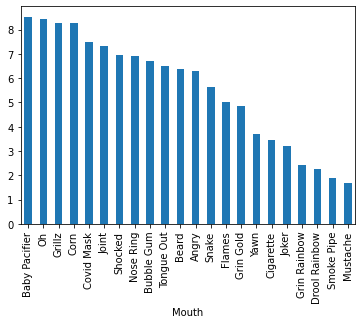

None


In [72]:
trait_list = ['Clothes','Ears','Eyes','Fur','Hat','Mouth']
for i in trait_list:
    plt.figure()
    recent_sales.groupby([i])['sale_price'].agg('sum').sort_values(ascending=False).plot(kind='bar')
    print(plt.show())

In [162]:
trait_price = pd.DataFrame()
for trait in trait_list:
    for i in recent_sales[trait].dropna().unique():
        df=recent_sales[recent_sales[trait]==i]
        trait_price= trait_price.append({'trait_class':trait,
                            'trait':i,
                            'num_sales':df.shape[0],
                            'median_price':df['sale_price'].median(),
                            '30day_volume': df['sale_price'].sum()},
                           ignore_index=True)
        
trait_price=trait_price.sort_values('median_price',ascending=False)
trait_price['trait_name']= trait_price['trait'].str.cat(' '+trait_price['trait_class'])

trait_price

,trait_class,trait,num_sales,median_price,30day_volume,trait_name
64,Fur,Robot,1.0,3.00000,3.0000,Robot Fur
1,Clothes,Batman,2.0,0.91500,1.8300,Batman Clothes
83,Hat,Crown,3.0,0.76000,2.2100,Crown Hat
71,Fur,Rainbow,3.0,0.69000,1.9800,Rainbow Fur
6,Clothes,Iron Man,6.0,0.67500,3.8420,Iron Man Clothes
...,...,...,...,...,...,...
60,Eyes,Cyclops,12.0,0.30615,3.9333,Cyclops Eyes
32,Clothes,Mexican,9.0,0.30000,2.7280,Mexican Clothes
131,Mouth,Angry,20.0,0.30000,6.3050,Angry Mouth
0,Clothes,Grey Striped T-Shirt,15.0,0.30000,7.4714,Grey Striped T-Shirt Clothes


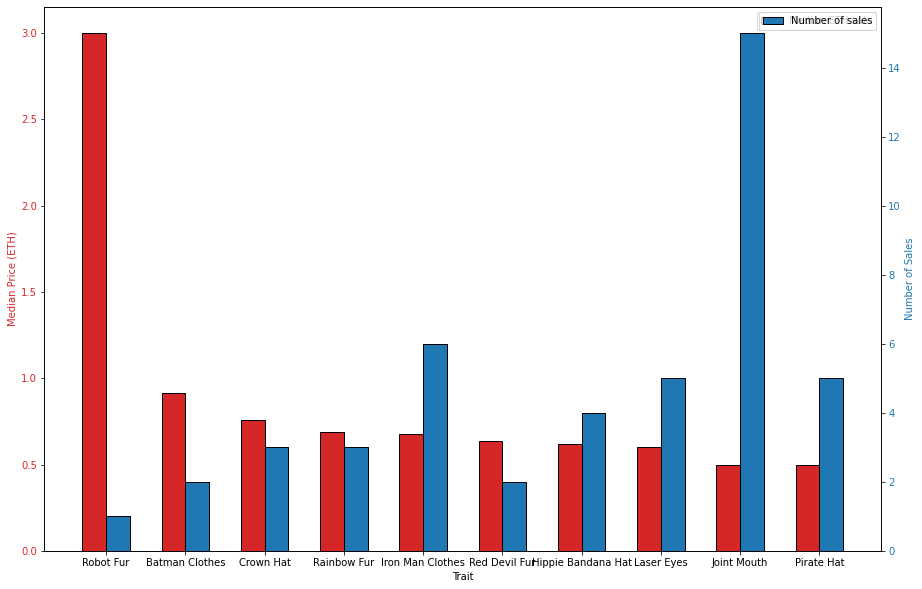

In [174]:
#make a plot of survival data
top_n = 10
barWidth = 0.3
x1 = np.arange(top_n)
x2 = [x + barWidth for x in x1]

fig, ax1 = plt.subplots(figsize=(15,10))
color1 = 'tab:red'
ax1.set_xlabel('Trait')
ax1.set_ylabel('Median Price (ETH)', color=color1)
ax1.bar(x1, trait_price['median_price'].iloc[0:top_n], width = barWidth, color = color1, edgecolor = 'black', label='Median ETH sale')
ax1.tick_params(axis='y', labelcolor=color1)


ax2 = ax1.twinx() 
color2 = 'tab:blue'
ax2.set_ylabel('Number of Sales', color=color2)  # we already handled the x-label with ax1
ax2.bar(x2, trait_price['num_sales'].iloc[0:top_n], width = barWidth, color = color2, edgecolor = 'black', label='Number of sales')
ax2.tick_params(axis='y', labelcolor=color2)

#labels for plot
ax1.tick_params(axis='x',[r + barWidth/2 for r in range(top_n)], trait_price['trait_name'].iloc[0:top_n],rotation =90)

ax1.legend()
ax2.legend()
#plt.title(f'Survival rate of titanic passengers by {discrete_var}')
plt.show()

In [133]:
import seaborn as sns
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451)]

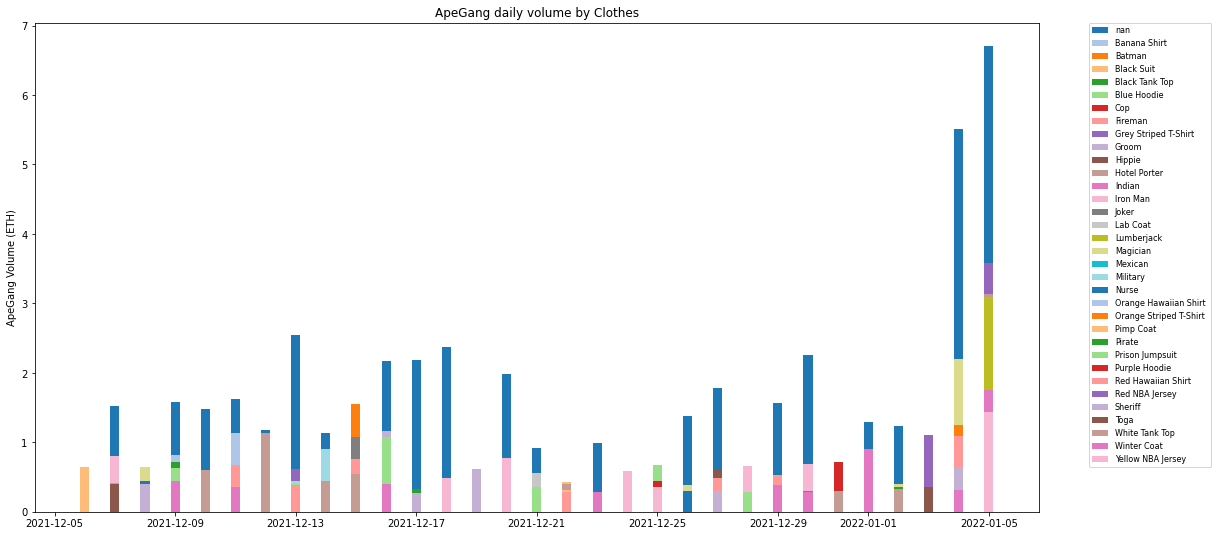

None


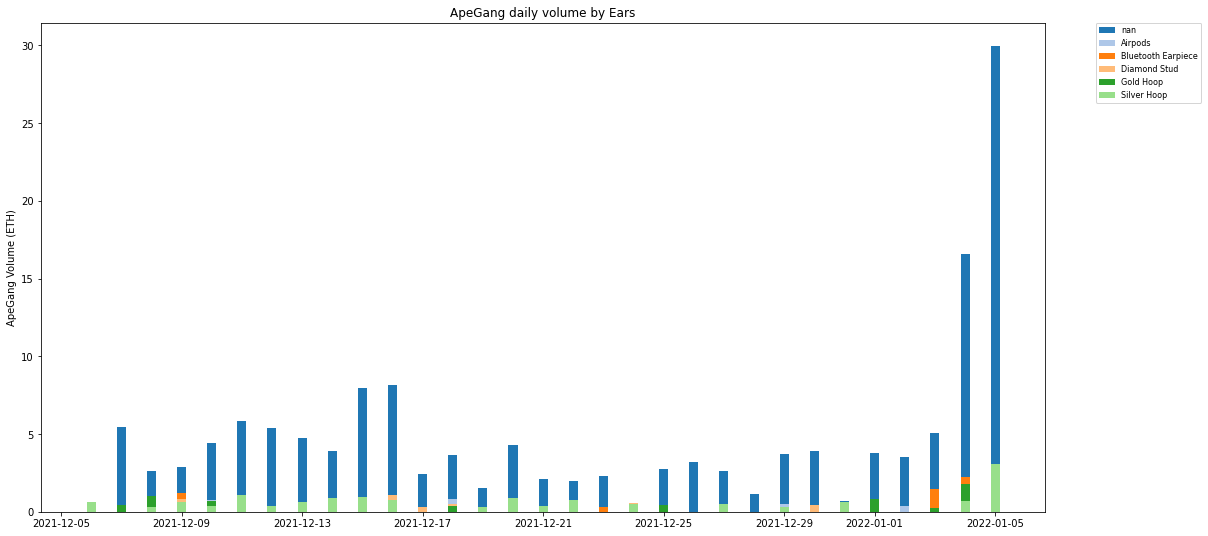

None


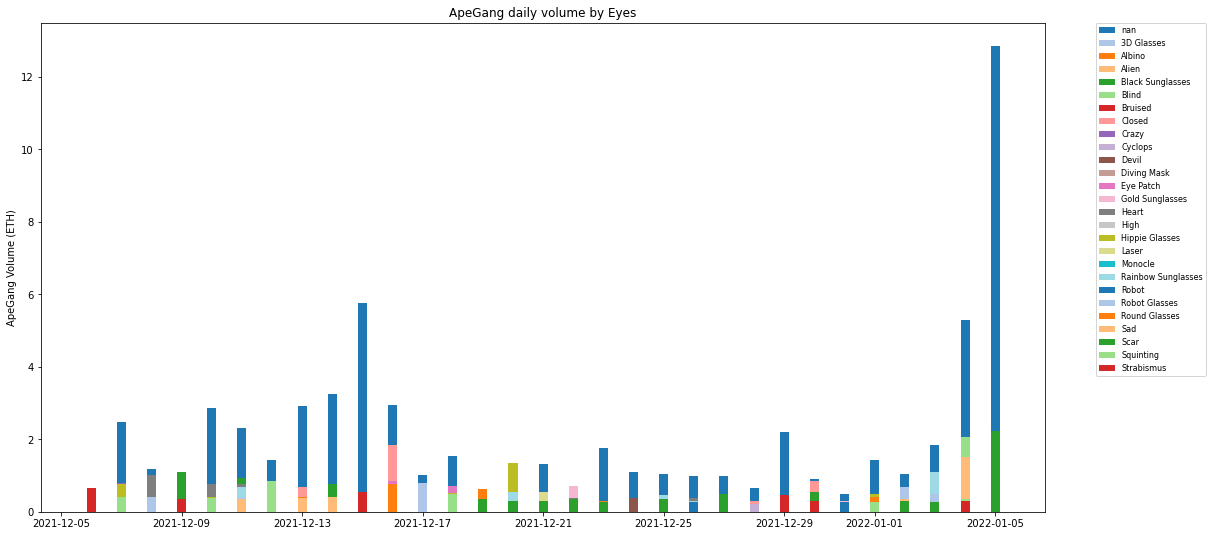

None


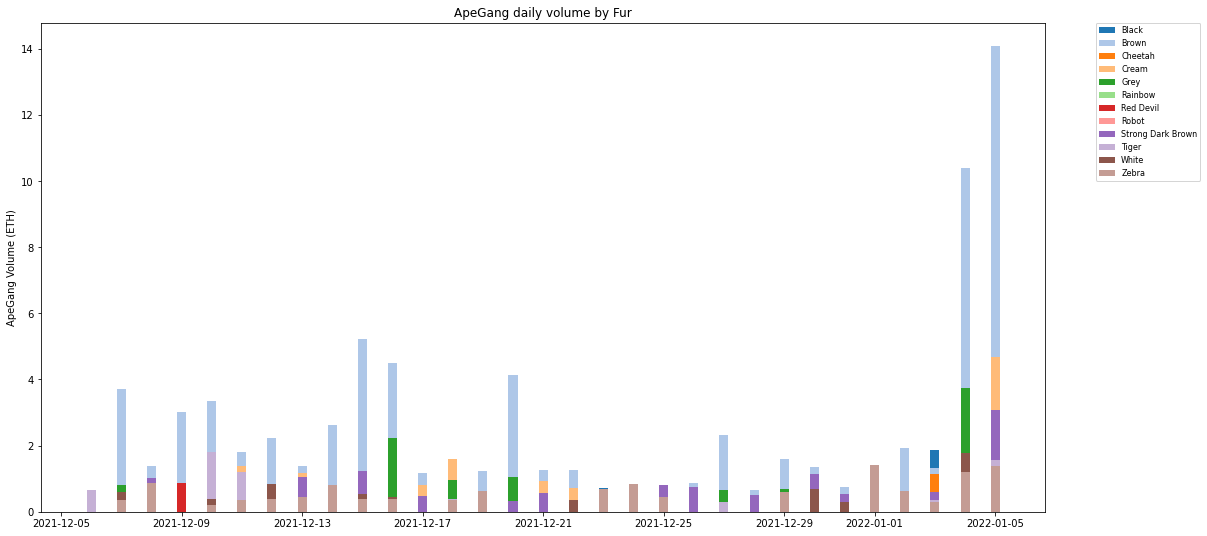

None


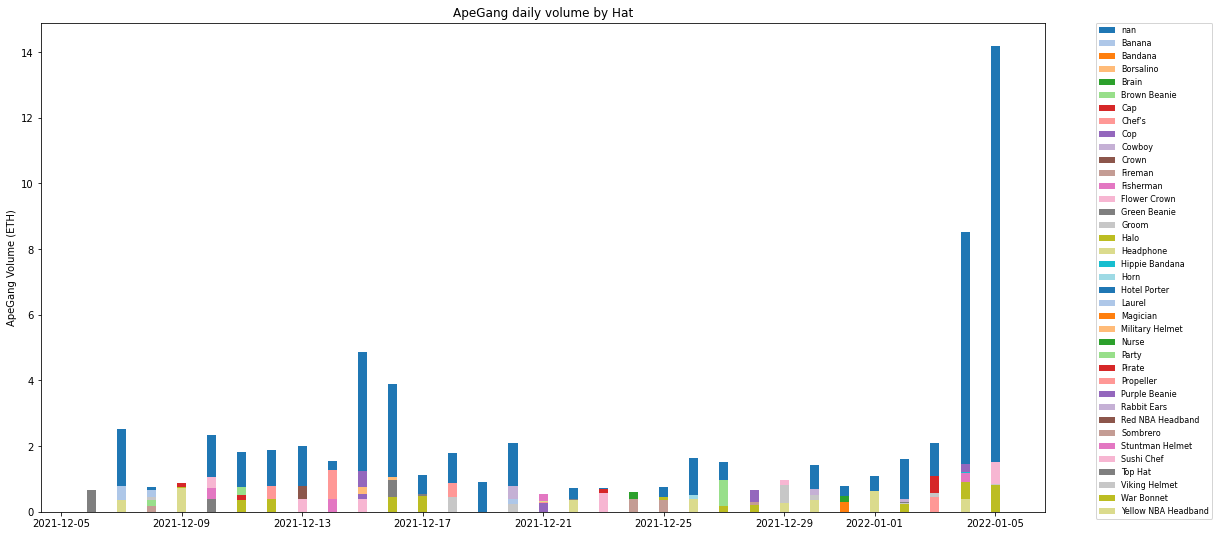

None


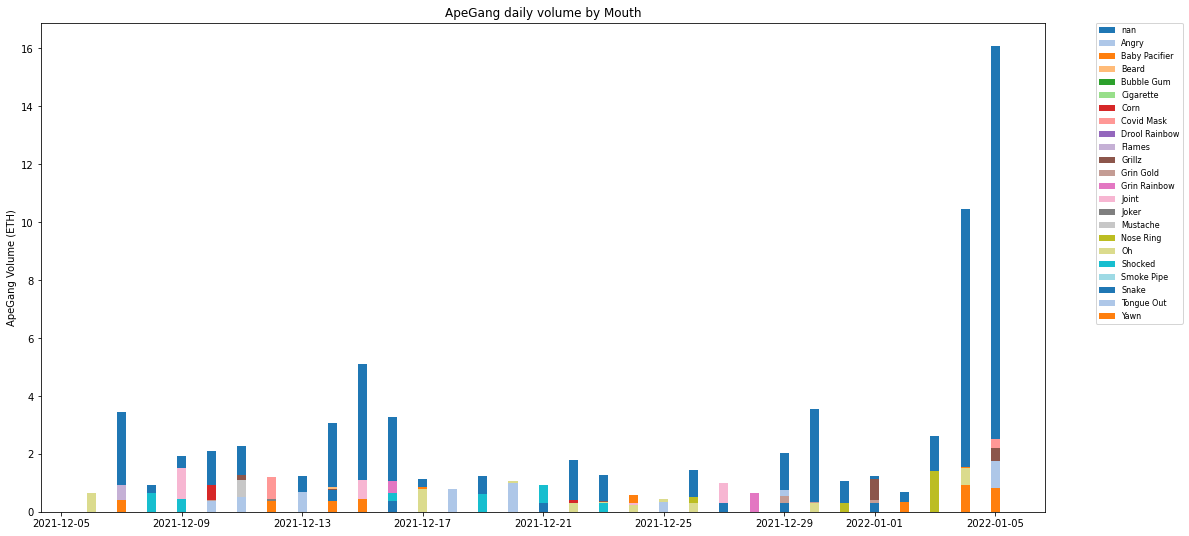

None


In [153]:
recent_sales['day'] = recent_sales.time.dt.date
for trait in trait_list:
    df = pd.DataFrame(recent_sales.groupby([trait,'day'],dropna=False)['sale_price'].agg('sum')).reset_index()#.sort_values(ascending=False).plot(kind='bar')
    df['day'] = pd.to_datetime(df['day'])
    df2= df.pivot(index='day',columns=trait,values='sale_price')
    palette = sns.color_palette('tab20', len(df2.columns))
    

    fig, ax = plt.subplots(figsize=(18,9))
    for i , col in enumerate(df2.columns):
        ax.bar(df2.index, df2[col], 0.3,label=col,color=palette[i] )
        
    ax.set_ylabel('ApeGang Volume (ETH)')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=8)
    ax.set_title(f'ApeGang daily volume by {trait}')
    print(plt.show())



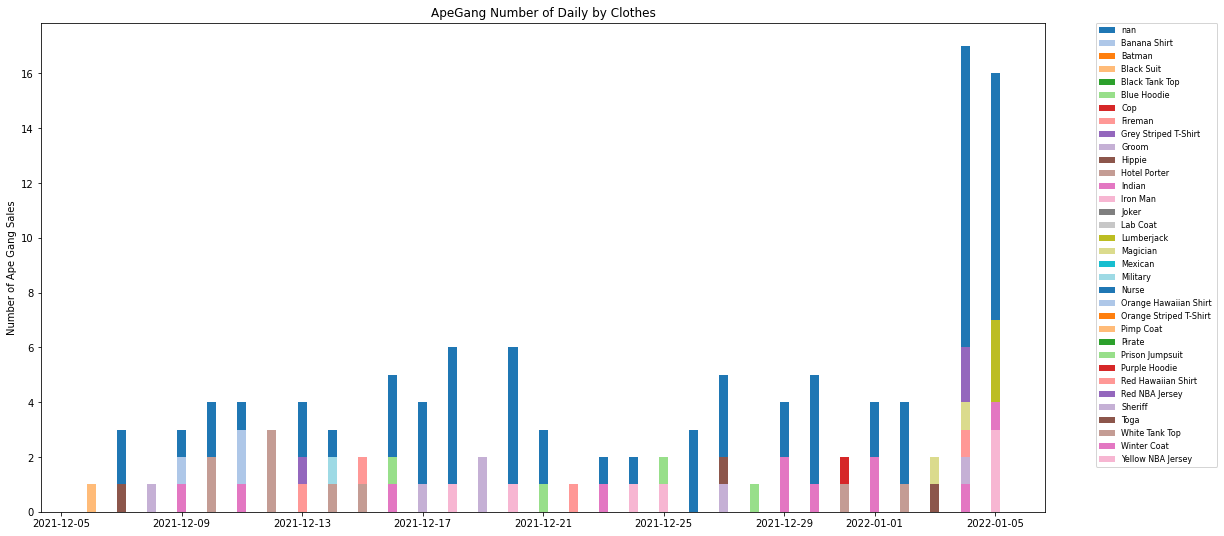

None


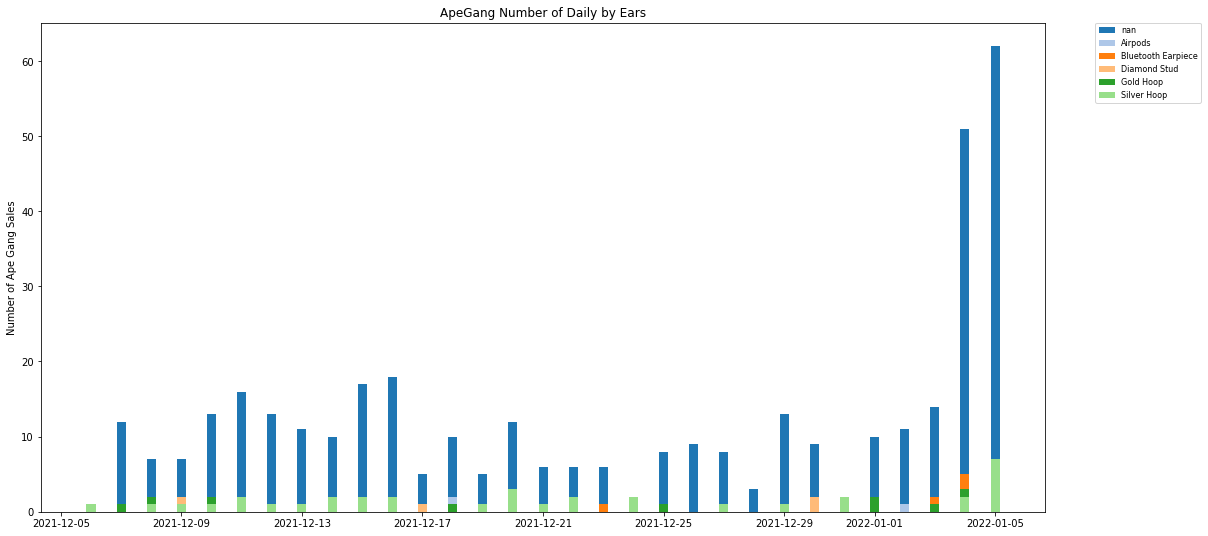

None


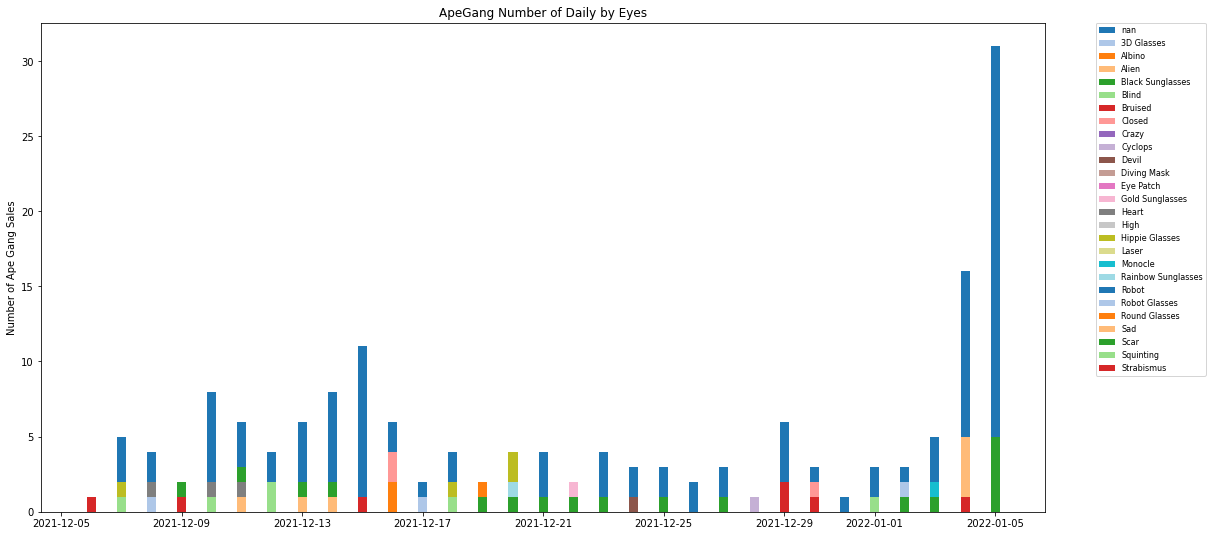

None


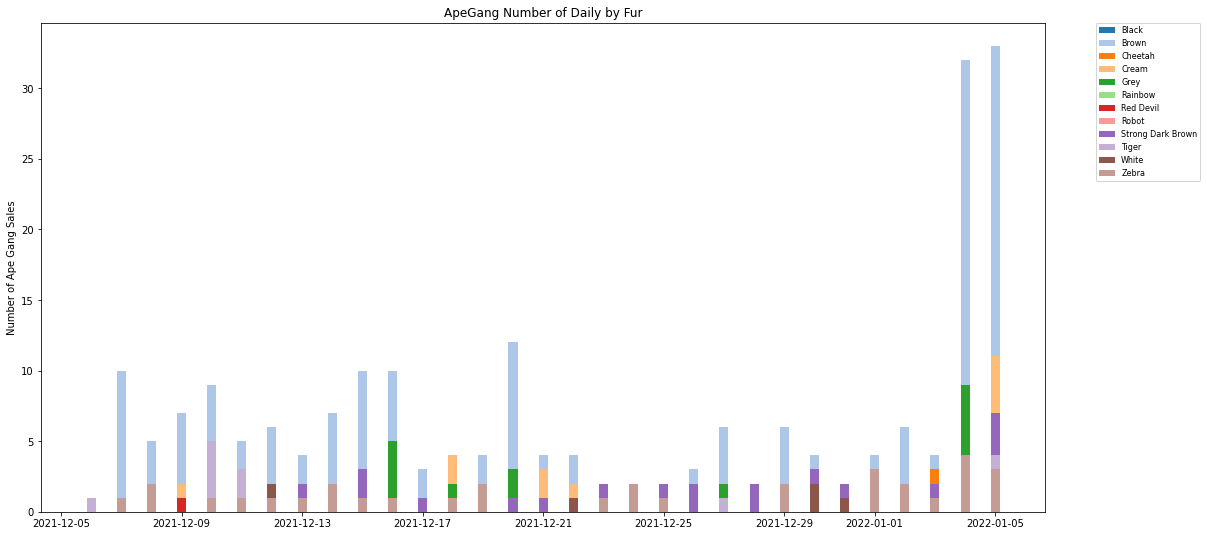

None


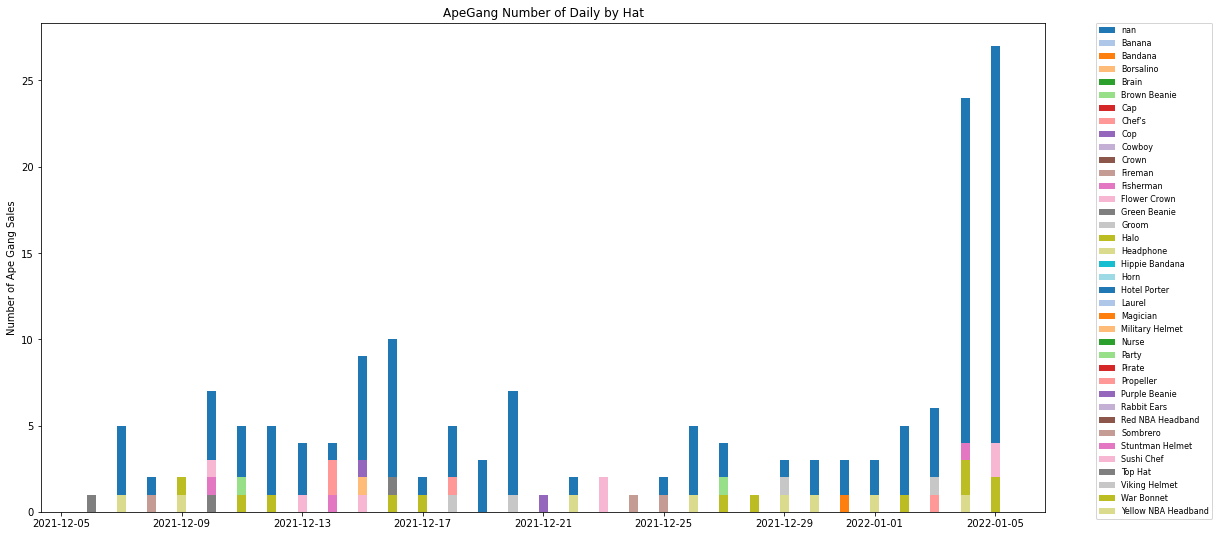

None


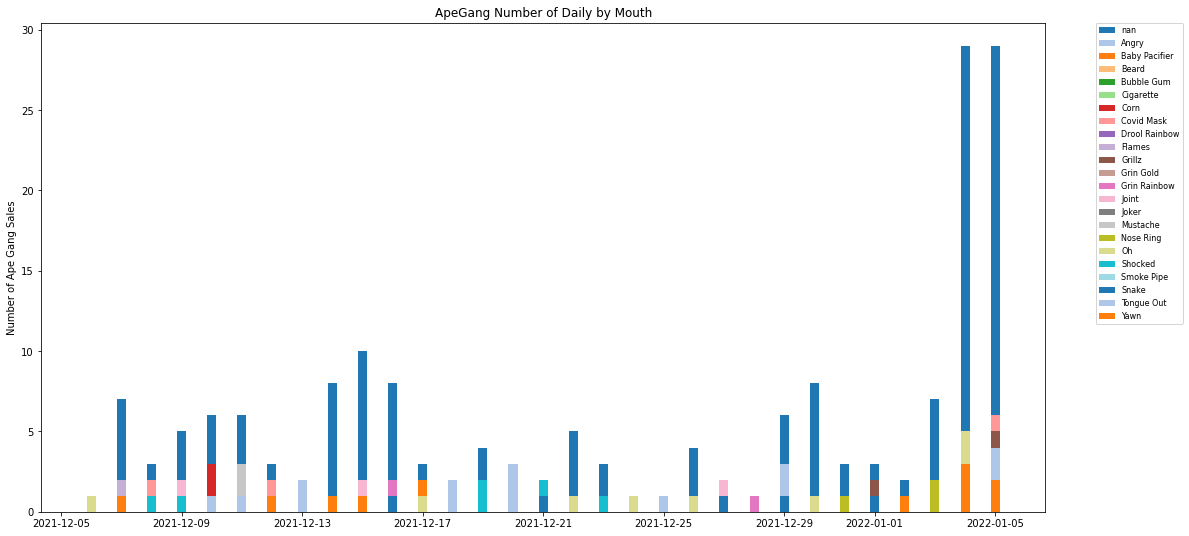

None


In [151]:
for trait in trait_list:
    df = pd.DataFrame(recent_sales[[trait,'day']].value_counts(dropna=False)).reset_index().rename(columns={0:'n_sales'})
    df['day'] = pd.to_datetime(df['day'])
    df2= df.pivot(index='day',columns=trait,values='n_sales')
    palette = sns.color_palette('tab20', len(df2.columns))
    

    fig, ax = plt.subplots(figsize=(18,9))
    for i , col in enumerate(df2.columns):
        ax.bar(df2.index, df2[col], 0.3,label=col,color=palette[i] )
        
    ax.set_ylabel('Number of Ape Gang Sales')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,fontsize=8)
    ax.set_title(f'ApeGang Number of Daily by {trait}')
    print(plt.show())
    
                      
    

In [51]:
collection = 'cool-cats-nft'
sales_period = 7

Events.update_opensea_events(collection)
sales = Database.read_mongo(f'{collection}_sales',return_df=True).drop_duplicates(subset=['asset_id','time'])
recent_sales = sales[sales.time > dt.datetime.now()-dt.timedelta(days=sales_period)]
print(f"{collection} {sales_period} day sale volume= {round(recent_sales.sale_price.sum(),2)}Eth. With {recent_sales.shape[0]} sales and a median sale of {round(recent_sales.sale_price.median(),2)} Eth")




-----------------------------------------------------------
Getting cool-cats-nft sales data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
244 sales found.
write sales to MongoDB
updating cool-cats-nft_sales with 244 documents.
-----------------------------------------------------------
Getting cool-cats-nft transfers data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
6 API calls made
7 API calls made
8 API calls made
394 transfers found.
updating cool-cats-nft_transfers with 394 documents.
-----------------------------------------------------------
Getting cool-cats-nft listings data...
1 API calls made
2 API calls made
3 API calls made
4 API calls made
5 API calls made
6 API calls made
7 API calls made
8 API calls made
9 API calls made
10 API calls made
11 API calls made
12 API calls made
13 API calls made
14 API calls made
15 API calls made
16 API calls made
17 API calls made
18 API calls made
19 API